# Visualisation

## Principal component analysis

[[-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 ...
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]]
         PC1        PC2     Category
0  -0.504663   2.608573  T-shirt/top
1 -18.182703   0.285265     Trousers
2   5.345144  -2.348569  T-shirt/top
3 -11.084712   1.340172        Dress
4  -1.613810  10.749582        Shirt


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

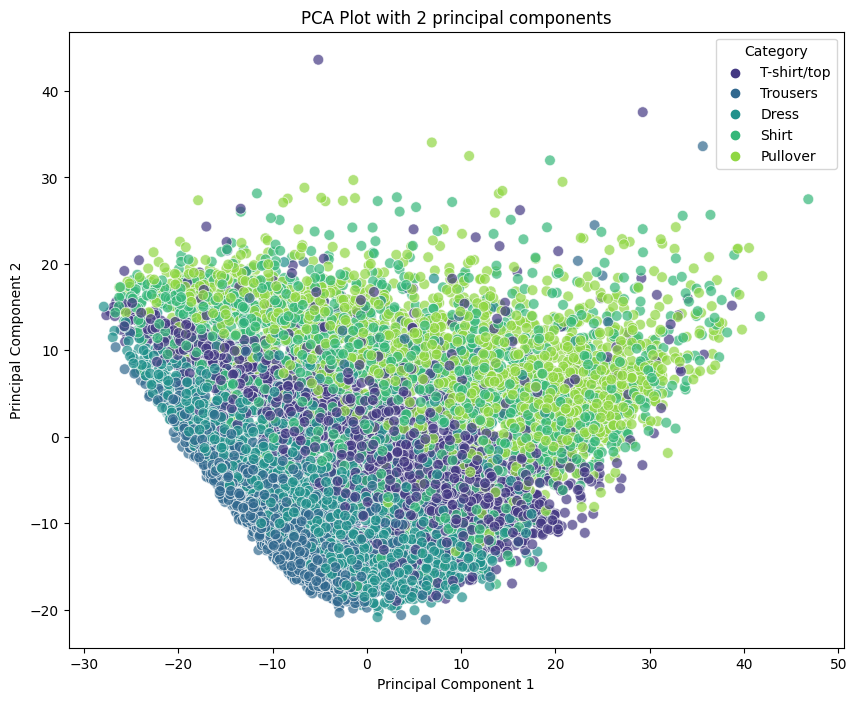

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
print(X_train_standardized)

# Apply PCA to the standardized data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_standardized)

# Create a DataFrame with the first two principal components and labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Category'] = y_train_strings

print(pc_df.head())

# Visualize the PCA plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Category', data=pc_df, palette='viridis', s=60, alpha=0.7)
plt.title('PCA Plot with 2 principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category')
plt.show()


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

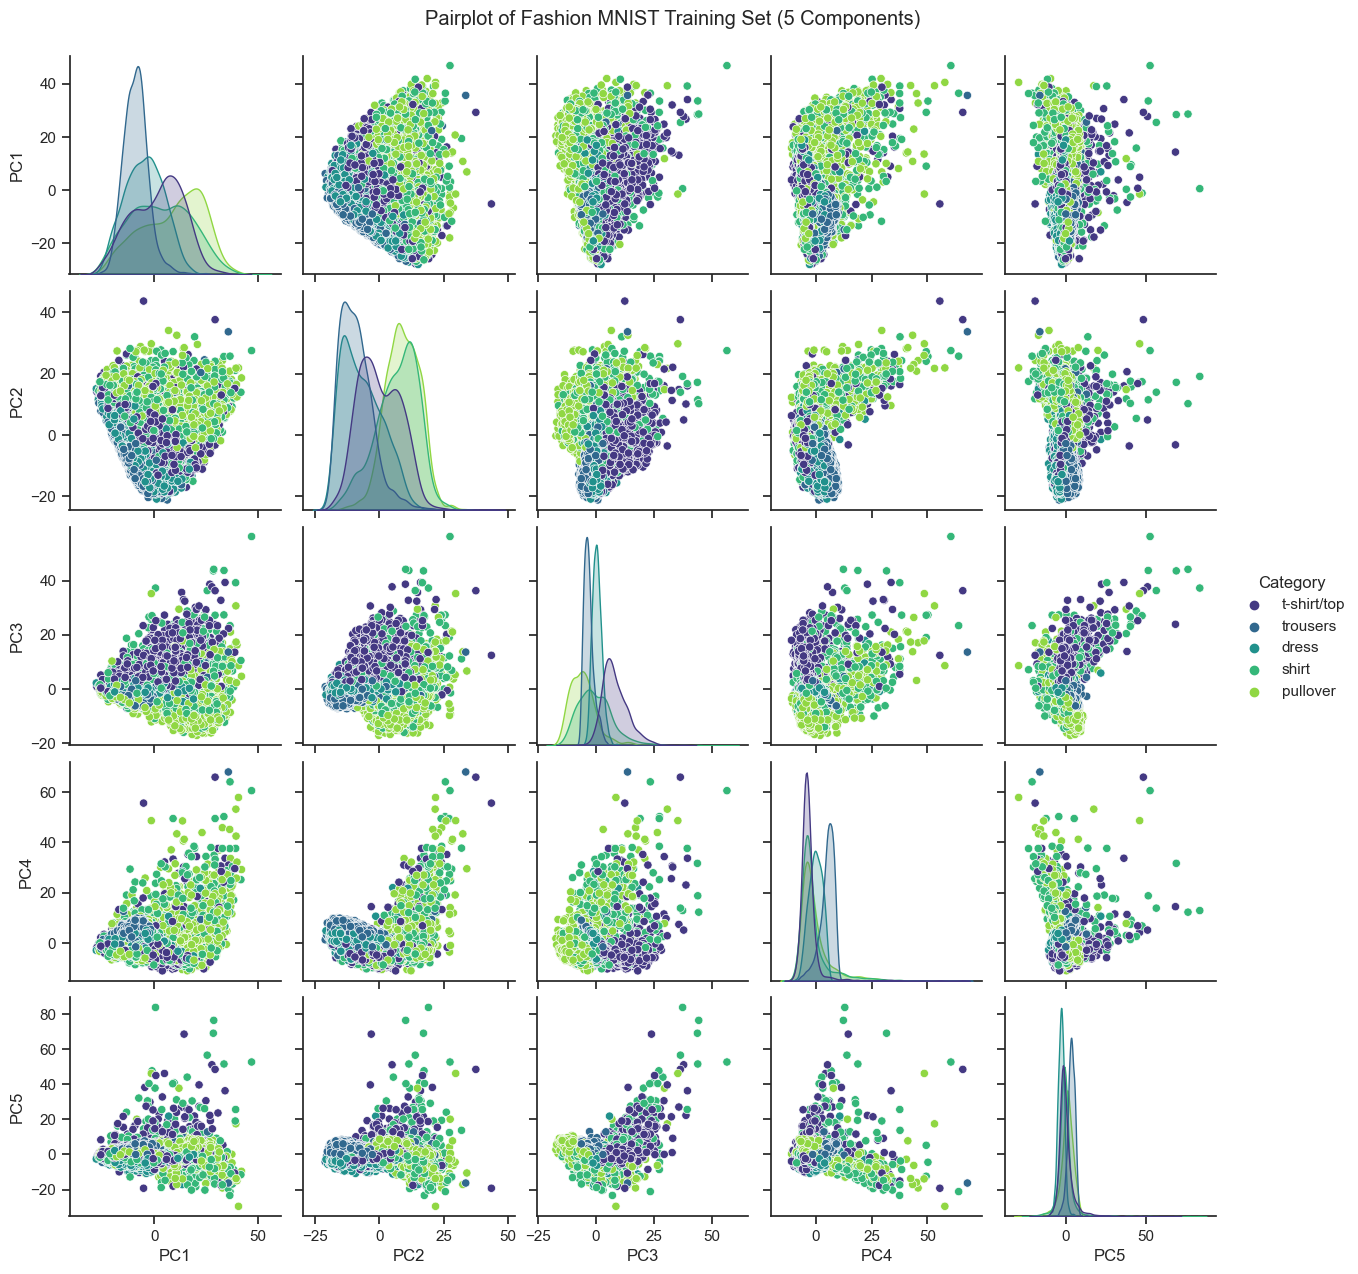

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "t-shirt/top", 1: "trousers", 2: "pullover", 3: "dress", 4: "shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Apply PCA to the standardized data with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_train_standardized)

# Create a DataFrame with the first five principal components and labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pc_df['Category'] = y_train_strings

# Visualize the pairplot using Seaborn
sns.set(style="ticks", color_codes=True)
sns.pairplot(pc_df, hue='Category', palette='viridis', markers='o', diag_kind='kde')
plt.suptitle('Pairplot of Fashion MNIST Training Set (5 Components)', y=1.02)
plt.show()


## Linear Discriminant Analysis

/var/folders/wk/rb21vvx97h93d00px44d7_yr0000gn/T/ipykernel_1488/3619953671.py:44: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))


        LD1       LD2     Category
0 -0.018059  0.002138  T-shirt/top
1  0.059630 -0.013965     Trousers
2 -0.011862  0.001460  T-shirt/top
3  0.002350  0.009344        Dress
4 -0.000875 -0.008360        Shirt


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

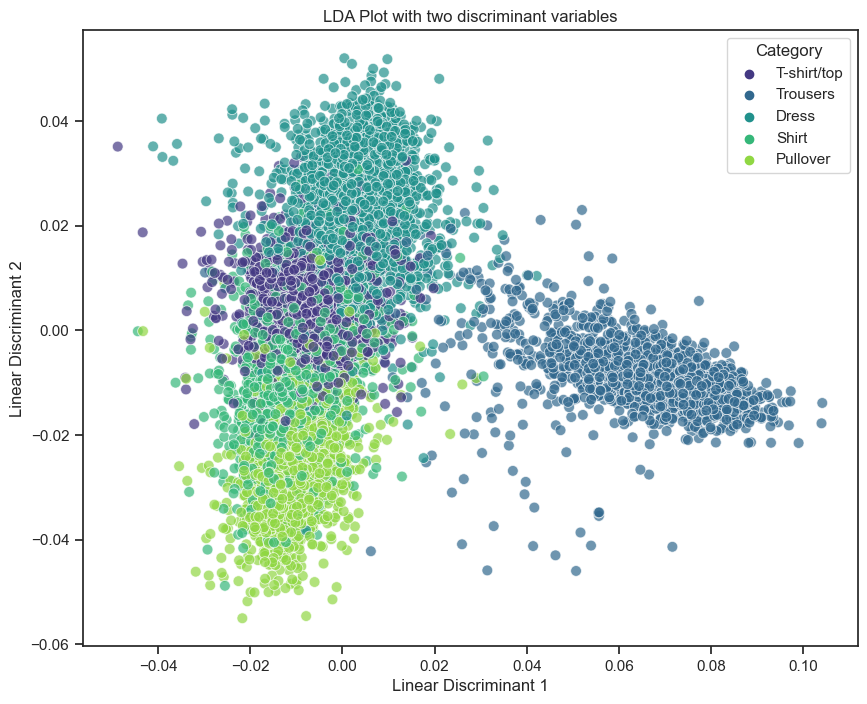

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def lda(X, y, num_components=2):
    """
    Linear Discriminant Analysis (LDA) implementation.

    Parameters:
    - X: Feature matrix (n_samples, n_features)
    - y: Class labels (n_samples,)
    - num_components: Number of linear discriminant components to keep

    Returns:
    - lda_components: Linear discriminant components (n_features, num_components)
    - explained_variance: Explained variance by each linear discriminant component
    """

    classes = np.unique(y)
    num_classes = len(classes)
    num_features = X.shape[1]

    # Compute class means
    class_means = np.array([np.mean(X[y == c], axis=0) for c in classes])

    # Compute overall mean
    overall_mean = np.mean(X, axis=0)

    # Compute between-class scatter matrix
    between_class_scatter = np.zeros((num_features, num_features))
    for c in classes:
        n = len(y[y == c])
        mean_diff = class_means[c] - overall_mean
        between_class_scatter += n * np.outer(mean_diff, mean_diff)

    # Compute within-class scatter matrix
    within_class_scatter = np.zeros((num_features, num_features))
    for c in classes:
        class_data = X[y == c]
        mean_diff = class_data - class_means[c]
        within_class_scatter += np.dot(mean_diff.T, mean_diff)

    # Solve the generalized eigenvalue problem for (S_w)^(-1) * S_b
    eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top num_components eigenvectors
    lda_components = eigenvectors[:, :num_components]

    # Compute explained variance
    explained_variance = eigenvalues[:num_components] / np.sum(eigenvalues)

    return lda_components, explained_variance

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Apply LDA to the data
lda_components, explained_variance = lda(X_train, y_train, num_components=2)

# Project the data onto the first two linear discriminant components
lda_projection = np.dot(X_train, lda_components)

# Create a DataFrame with the linear discriminant components and labels
lda_df = pd.DataFrame(data=lda_projection, columns=['LD1', 'LD2'])
lda_df['Category'] = y_train_strings
print(lda_df.head())

# Visualize the LDA plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', y='LD2', hue='Category', data=lda_df, palette='viridis', s=60, alpha=0.7)
plt.title('LDA Plot with two discriminant variables')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

# Classification

## Naive Bayes Classifier

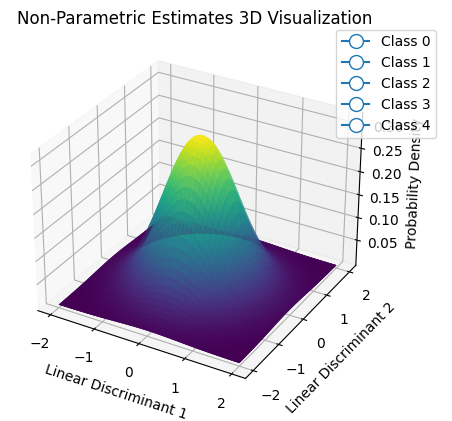

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

def visualize_kde_estimates_3d(class_conditionals, X_range, num_points=100):
    """
    Visualize KDE estimates using 3D surface plots.

    Parameters:
    - class_conditionals: List of KDE models (one for each class)
    - X_range: Range of values for the linear discriminant variables (2D case)
    - num_points: Number of points for visualization
    """

    X, Y = np.meshgrid(np.linspace(X_range[0], X_range[1], num_points), np.linspace(X_range[0], X_range[1], num_points))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i, kde in enumerate(class_conditionals):
        pos = np.dstack((X, Y))
        Z = kde.pdf(pos)
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, label=f'Class {i}')  # Specify color using colormap here

    ax.set_xlabel('Linear Discriminant 1')
    ax.set_ylabel('Linear Discriminant 2')
    ax.set_zlabel('Probability Density')

    # Create a separate 2D plot for the legend
    legend_elements = [Line2D([0], [0], marker='o', markerfacecolor='white', markersize=10, label=f'Class {i}') for i in range(len(class_conditionals))]
    ax2 = fig.add_axes([0.7, 0.7, 0.2, 0.2])  # Adjust position and size of the legend plot
    ax2.set_axis_off()
    ax2.legend(handles=legend_elements)

    ax.set_title('Non-Parametric Estimates 3D Visualization')
    plt.show()

# Example usage:
visualize_kde_estimates_3d(class_conditionals, X_range=(-2, 2), num_points=100)


In [20]:
import numpy as np
from scipy.stats import multivariate_normal

def calculate_non_parametric_estimates(X_lda, y, num_components=2, bandwidth=0.5):
    class_conditionals = []

    for c in np.unique(y):
        class_data = X_lda[y == c]
        mean_vector = np.mean(class_data, axis=0)
        covariance_matrix = np.cov(class_data.T) + np.eye(num_components) * bandwidth
        class_conditionals.append((mean_vector, covariance_matrix))

    return class_conditionals

def calculate_class_priors(y):
    class_priors = {}
    total_samples = len(y)

    for c in np.unique(y):
        class_priors[c] = len(y[y == c]) / total_samples

    return class_priors

def fit_naive_bayes_classifier(X, y, num_components=2, bandwidth=0.5):
    class_conditionals = calculate_non_parametric_estimates(X, y, num_components, bandwidth)
    class_priors = calculate_class_priors(y)

    return class_conditionals, class_priors

def predict_proba_naive_bayes(X, class_conditionals, class_priors):
    likelihoods = np.zeros((len(X), len(class_conditionals)))

    for i, (mean_vector, covariance_matrix) in enumerate(class_conditionals):
        mvn = multivariate_normal(mean_vector, covariance_matrix)
        likelihoods[:, i] = mvn.pdf(X)

    posterior_probs = np.zeros_like(likelihoods)

    for i in range(len(class_conditionals)):
        posterior_probs[:, i] = likelihoods[:, i] * class_priors[i]

    row_sums = posterior_probs.sum(axis=1, keepdims=True)
    posterior_probs /= row_sums

    return posterior_probs

def predict_naive_bayes(X, class_conditionals, class_priors):
    posterior_probs = predict_proba_naive_bayes(X, class_conditionals, class_priors)
    predictions = np.argmax(posterior_probs, axis=1)

    return predictions

# Example usage:
# Assuming lda_projection is the projected data from your LDA step
class_conditionals, class_priors = fit_naive_bayes_classifier(lda_projection, y_train)

# Load the Fashion MNIST test data
test_data = np.load('fashion_test.npy')

# Extract features (pixel values) and labels for the test set
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Project the test data onto the first two linear discriminant components
lda_projection_test = np.dot(X_test, lda_components)

# Make predictions
predictions = predict_naive_bayes(lda_projection_test, class_conditionals, class_priors)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.2


## Second classifier

## Third classifier